In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [2]:
# load the file
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Deep Learning Keras

In [3]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1), 
                                                    df['Class'], test_size=0.2, 
                                                    random_state=42)

In [4]:
# resample the highly unbalanced dataset
sm = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

print("After resampled, counts of label '1': {}".format(sum(y_train_resampled==1)))
print("After resampled, counts of label '0': {}".format(sum(y_train_resampled==0)))

After resampled, counts of label '1': 227451
After resampled, counts of label '0': 227451


In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_resampled)
X_test_scaled = sc.transform(X_test)

X_train_scaled = np.asarray(X_train_scaled)
y_train_resampled = np.asarray(y_train_resampled)

In [6]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=30, units=6, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model_info = model.fit(X_train_scaled, y_train_resampled, batch_size = 64, epochs = 20)

Train on 454902 samples
Epoch 1/20
454902/454902 [==============================] - 44s 97us/sample - loss: 0.0912 - accuracy: 0.9677
Epoch 2/20
454902/454902 [==============================] - 58s 127us/sample - loss: 0.0469 - accuracy: 0.9833
Epoch 3/20
454902/454902 [==============================] - 42s 91us/sample - loss: 0.0409 - accuracy: 0.9856
Epoch 4/20
454902/454902 [==============================] - 40s 89us/sample - loss: 0.0387 - accuracy: 0.9863
Epoch 5/20
454902/454902 [==============================] - 39s 85us/sample - loss: 0.0373 - accuracy: 0.9869
Epoch 6/20
454902/454902 [==============================] - 38s 83us/sample - loss: 0.0363 - accuracy: 0.9873
Epoch 7/20
454902/454902 [==============================] - 34s 74us/sample - loss: 0.0357 - accuracy: 0.9875
Epoch 8/20
454902/454902 [==============================] - 34s 75us/sample - loss: 0.0350 - accuracy: 0.9878
Epoch 9/20
454902/454902 [==============================] - 35s 77us/sample - loss: 0.0342 - ac

In [8]:
y_pred = model.predict_classes(X_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',acc)

Accuracy: 99.14153295179243


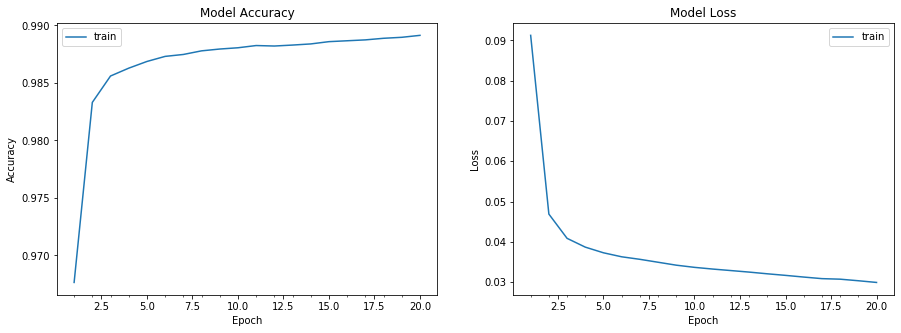

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # draw model accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # draw model loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
plot_model_history(model_info)